In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import dataproject_functions1
df1= dataproject_functions1.load_and_process("../../data/raw/Dataset_irobinson.csv.csv")
df1.head(5)


,id,turns,victory_status,winner,time,white_rating,black_rating,moves,opening_ply,move_name_and_eco
0,Z1M9z44Z,1,resign,white,10+0,1670,1175,e4,1,King's Pawn(B00)
1,3K5kYPO8,1,resign,black,10+0,1464,1355,g3,1,Hungarian Opening(A00)
2,3NQKJmJ5,1,outoftime,white,5+15,2404,1616,e4,1,King's Pawn(B00)
3,01dkNQ2O,1,outoftime,white,20+10,2438,1666,e4,1,King's Pawn(B00)
4,LAFV9u5Q,1,outoftime,white,20+10,2438,1885,e4,1,King's Pawn(B00)


In [2]:
#breakdown of key information regarding the numerical data
df1.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [3]:
#correlations of numerical data
df1.corr()

,turns,white_rating,black_rating,opening_ply
turns,1.000000,0.129753,0.160467,0.055999
white_rating,0.129753,1.000000,0.634171,0.277379
black_rating,0.160467,0.634171,1.000000,0.255396
opening_ply,0.055999,0.277379,0.255396,1.000000


<AxesSubplot:>

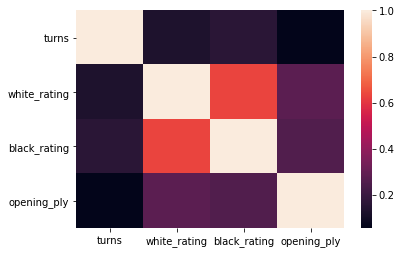

In [4]:
#Are any correlations between opening ply and colour?
sns.heatmap(df1.corr())

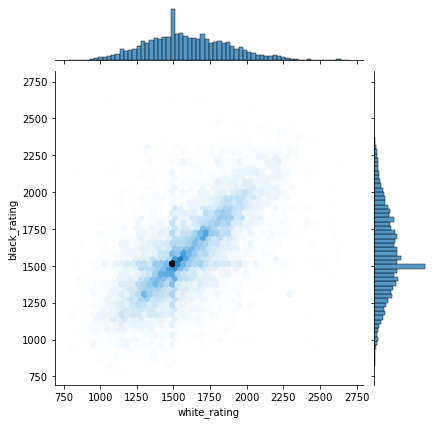

In [5]:
#comparing player ratings
sns.jointplot(x='white_rating',y='black_rating',data=df1,kind='hex')

<AxesSubplot:xlabel='winner', ylabel='turns'>

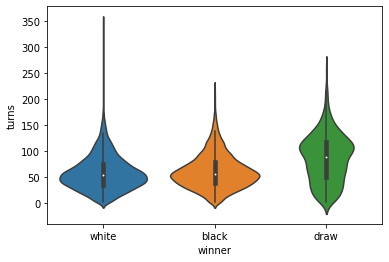

In [6]:
#who were the winners
sns.violinplot(data=df1,x='winner',y='turns')

In [7]:
#what are the most popular openings?

df_top_ecos=df1['move_name_and_eco'].value_counts().head(25).to_frame()
df_top_ecos.columns = ['value_counts']
df_top_ecos_fixed=df_top_ecos.reset_index()
df_top_ecos_fixed.rename(columns={'index':'Opening Name'})

,Opening Name,value_counts
0,Van't Kruijs Opening(A00),368
1,Sicilian Defense: Bowdler Attack(B20),296
2,French Defense: Knight Variation(C00),271
3,Scandinavian Defense: Mieses-Kotroc Variation(...,259
4,Queen's Pawn Game: Mason Attack(D00),232
5,Scandinavian Defense(B01),223
6,Horwitz Defense(A40),209
7,Philidor Defense #3(C41),198
8,Philidor Defense #2(C41),193
9,Indian Game(A45),181


In [8]:
df_top_ecos_fixed.columns

Index(['index', 'value_counts'], dtype='object')

<AxesSubplot:xlabel='value_counts', ylabel='index'>

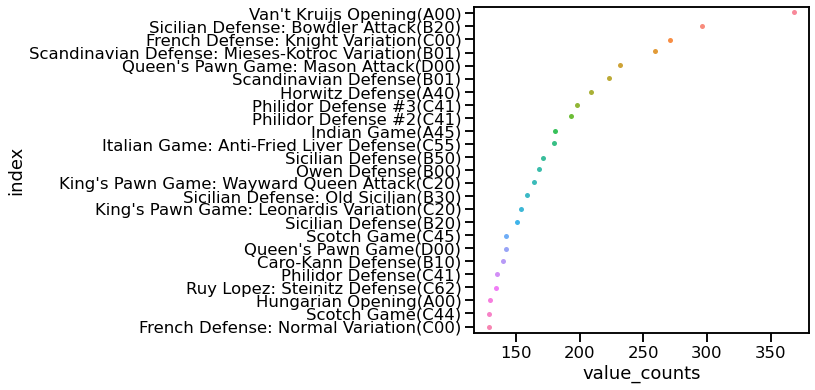

In [13]:
plt.figure(figsize=(6,6))
sns.stripplot(y='index',x='value_counts',data=df_top_ecos_fixed)

In [16]:
df_high_frequencies=(df1.groupby('winner')['move_name_and_eco']
                     .value_counts()
                     .sort_values(ascending=False)
                     .head(25)
                     .to_frame()
    
                     )
df_high_frequencies.columns = ['value_counts']
df_most_frequent= df_high_frequencies.reset_index()          
df_most_frequent

,winner,move_name_and_eco,value_counts
0,black,Van't Kruijs Opening(A00),226
1,white,Scandinavian Defense: Mieses-Kotroc Variation(...,164
2,black,Sicilian Defense: Bowdler Attack(B20),164
3,white,French Defense: Knight Variation(C00),135
4,white,Philidor Defense #3(C41),127
5,white,Van't Kruijs Opening(A00),126
6,black,Scandinavian Defense(B01),123
7,black,French Defense: Knight Variation(C00),121
8,white,Sicilian Defense: Bowdler Attack(B20),119
9,white,Queen's Pawn Game: Mason Attack(D00),116


Text(0.5, 1.0, 'Number of Wins Per Opening Per Colour')

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

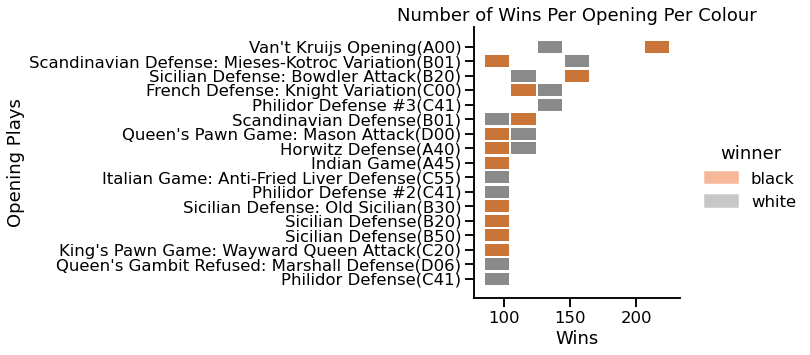

In [18]:
#sort most popular opening ECOs by colour

df_high_frequencies=(df1.groupby('winner')['move_name_and_eco']
                     .value_counts()
                     .sort_values(ascending=False)
                     .head(25)
                     .to_frame()
    
                     )
df_high_frequencies.columns = ['value_counts']
df_most_frequent= df_high_frequencies.reset_index()          

#plotting number of wins per strategy per side 
sns.set_context('talk')
sns.despine()
plt.figure(figsize=(5,5))
sns.displot(y='move_name_and_eco',x='value_counts',data=df_most_frequent,hue='winner',aspect=2,edgecolor='w',palette='RdGy')
plt.ylabel('Opening Plays')
plt.xlabel('Wins')
plt.title('Number of Wins Per Opening Per Colour')

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(y='move_name_and_eco',data=df1.head(10))
plt.xlabel('Counts')
plt.ylabel('Opening Move (ECO)'
plt.savefig('Opening Move (ECO)')

SyntaxError: invalid syntax (<ipython-input-23-3997e614c730>, line 5)